<a href="https://colab.research.google.com/github/sagarrokad1/Customer-Segmentation/blob/main/Self_Notebook_Of_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **Loading Libraries & Data**

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import datetime as dt
import squarify
from sklearn.cluster import KMeans
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Loading Dataset
df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Customer Segmentation - Sagar Rokad/Data/Online-Retail.csv')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [10]:
#dropping redundant values
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(536641, 8)

**Top 10 Ordering Countries**

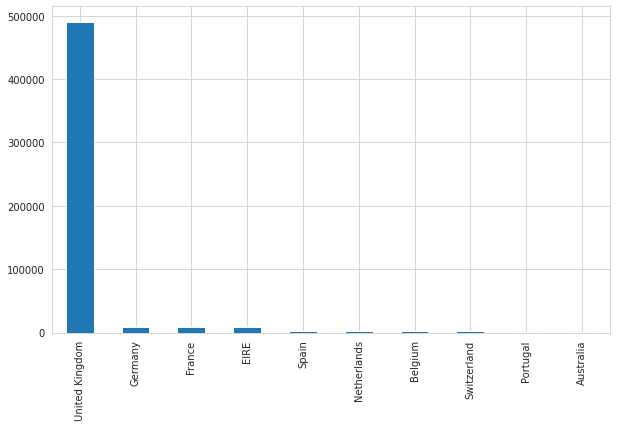

In [12]:
df.Country.value_counts().head(10).plot.bar(figsize=(10,6))

**Bottom 10 Ordering Countries**

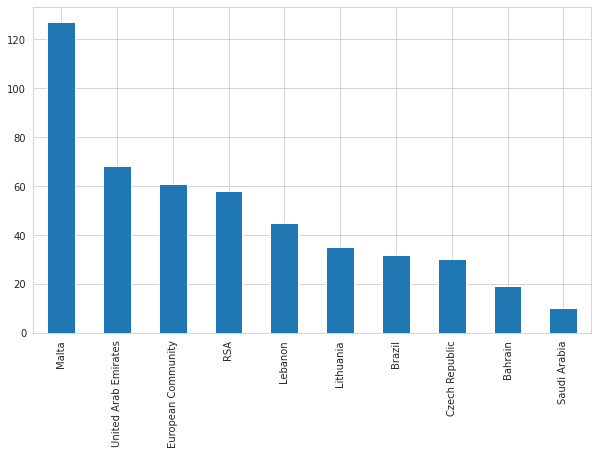

In [13]:
df.Country.value_counts().tail(10).plot.bar(figsize=(10,6))

**No. of Unique Customers**

In [14]:
len(df.CustomerID.unique())

4373

**No. of unique products and stock codes**

In [15]:
#Find number of unique items in stock
print(f"Number of unique item stock codes: {len(df.StockCode.unique())}")
print(f"Number of unique item descriptions: {len(df.Description.unique())}")

Number of unique item stock codes: 4070
Number of unique item descriptions: 4224


**The count of unique stock unit ids and their descriptions should have matched but they do not. This implies some stock units might have more than one descriptions. Let us examine the reasons behind this data quality issue:**

In [16]:
#Find out the stock units that have more than one description
dfStockDesc = df.groupby(["StockCode","Description"]).count().reset_index()
dfStockDesc.StockCode.value_counts()[dfStockDesc.StockCode.value_counts()>1].reset_index().head()

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,23131,5


**Now, let us examine how a single unit code has multiple description:**

In [17]:
df[df['StockCode'] == 
         dfStockDesc.StockCode.value_counts()
         [dfStockDesc.StockCode.value_counts()>1].reset_index()
         ['index'][8]]['Description'].unique()

array(['HYACINTH BULB T-LIGHT CANDLES', 'Dotcom set',
       'wrongly sold as sets', '?sold as sets?', 'check'], dtype=object)

**We notice that this description is a manually entered field and thus has discrepancies and inconsistencies. However, since the objective of this task is customer segmentation, we avoid exploring and resolving this issue further**

In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,536641.000000,536641.000000,401604.000000
mean,9.620029,4.632656,15281.160818
std,219.130156,97.233118,1714.006089
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13939.000000
50%,3.000000,2.080000,15145.000000
75%,10.000000,4.130000,16784.000000
max,80995.000000,38970.000000,18287.000000


*   We see 10 goods being sold on an average with a standard deviation of around 200. Also, the minimum quantity includes a negative value, this implies that the dataset includes returned items as well, a common scenario in retail domain.


*  The unit price field echoes the similar observations as Quantity variable.







### **Negative Values**

In [19]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [20]:
cancelled_orders[cancelled_orders['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Since nothing came back when we filtered the cancelled orders by Quantity > 0, this confirms that the negative values mean the order was cancelled.**

**How many orders were cancelled?**

In [21]:
print("There were", len(cancelled_orders), "cancelled orders.")

#Calculate the percentage of cancellations by dividing the cancelled orders by the total orders
total_orders = df['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9251 cancelled orders.
Percentage of orders cancelled: 35.72% 


**9288 or about 36% of the orders were cancelled. Looking deeper into why these orders were cancelled may prevent future cancellations.**

**Now let's find out what a negative UnitPrice means.**

In [22]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


**The description of "Adjust bad debt" tells us that this is an adjustment for a customer with insufficient funds or an allowance for a customer who never paid for the order.**

### **Exploring the Orders**

**What's the average number of orders per customer ?**

In [23]:
#Find the unique number of InvoiceNo  per customer
groupby_customers = pd.DataFrame(df.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.0,2
12347.0,7
12348.0,4
12349.0,1
12350.0,1


In [24]:
groupby_customers.describe()

,InvoiceNo
count,4372.000000
mean,5.075480
std,9.338754
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,248.000000


**The average number of orders per customer is 3.**

**What's the average number of unqiue items per order and per customer?**

In [25]:
groupby_ID = pd.DataFrame(df.groupby('CustomerID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

,Number of Items per Customer
CustomerID,
12346.0,1
12347.0,103
12348.0,22
12349.0,73
12350.0,17


In [26]:
groupby_ID.describe()

,Number of Items per Customer
count,4372.000000
mean,61.211116
std,85.425119
min,1.000000
25%,15.000000
50%,35.000000
75%,77.000000
max,1794.000000


In [27]:
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of Items per Order']
groupby_invoice.head()

,Number of Items per Order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [28]:
groupby_invoice.describe()

,Number of Items per Order
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


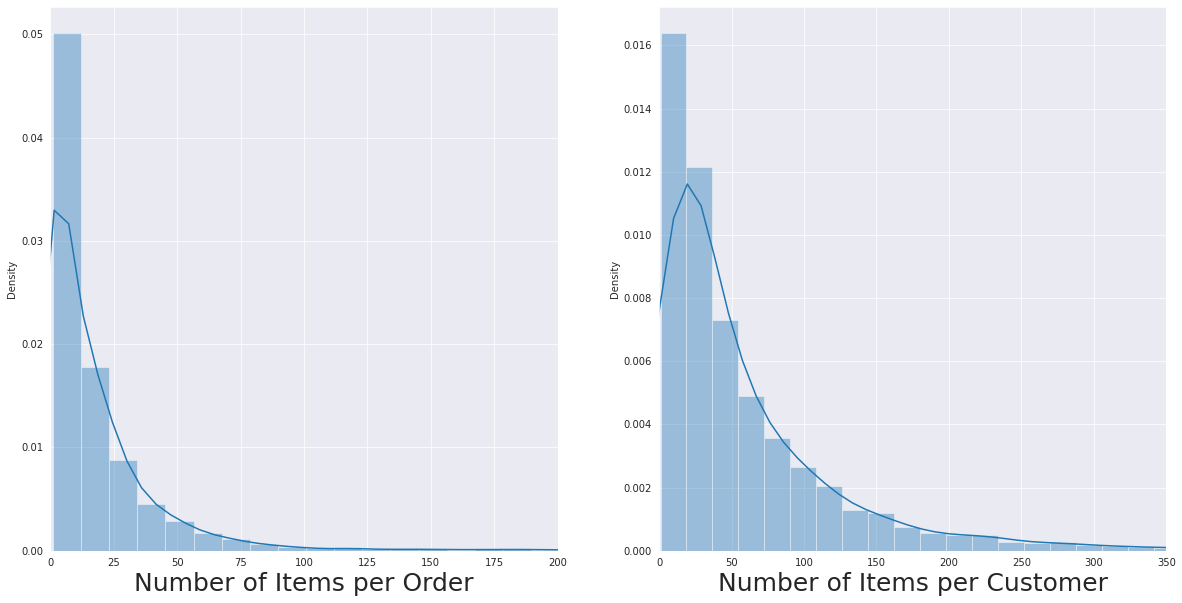

In [29]:
#Visualize the distribution of both
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
plt1 = sns.distplot(groupby_invoice['Number of Items per Order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()

**We have skewed left distributions for both plots. The average number of items per order is 20.5 and the average number of items per customer is 61.2.**

#### **What's the total revenue per country?**

**Let's look at the number of customers by country to get an idea of which countries have the most orders.**

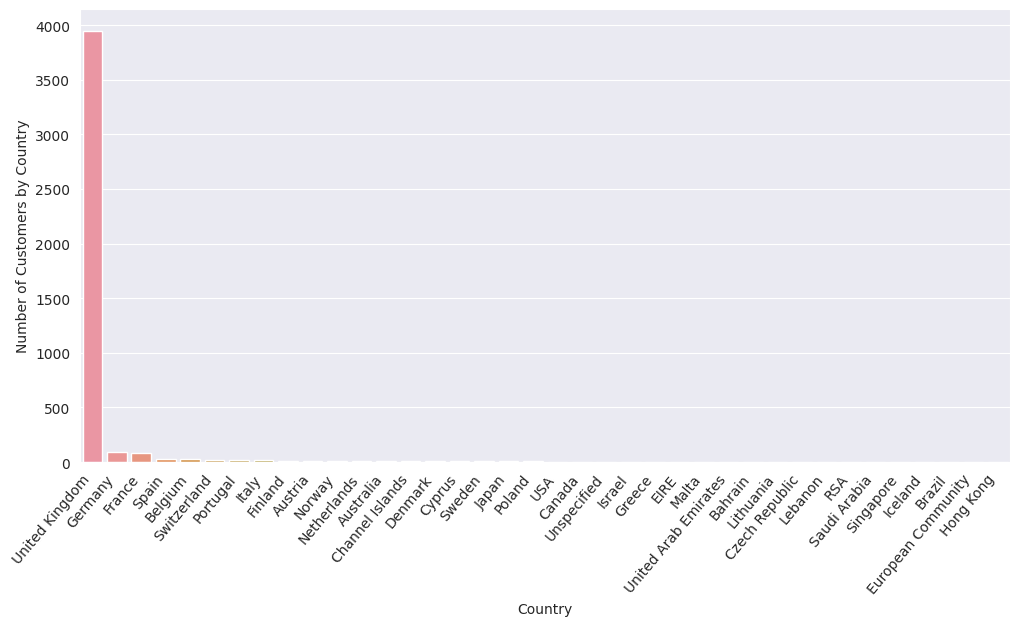

In [30]:
country_df = pd.DataFrame(df.groupby('Country')['CustomerID'].nunique())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.index, y=country_df['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

**The United Kingdom has significantly more customers than the other countries in our data set, so their total cost should look similar.**

In [31]:
df['Total_Cost'] = df['Quantity'] * df['UnitPrice']

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


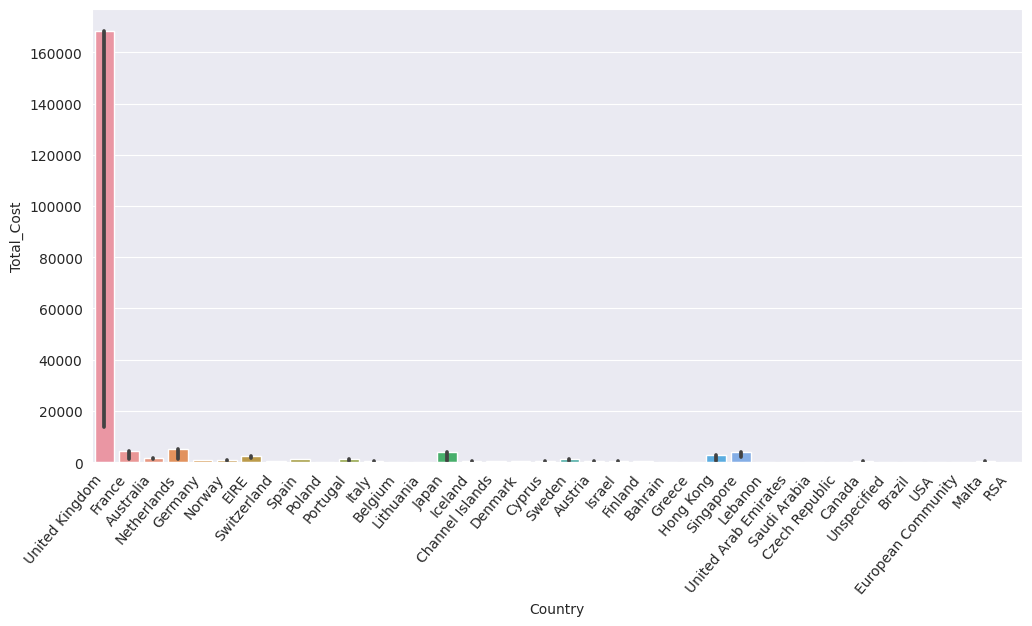

In [33]:
fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
ax1=sns.barplot(x='Country', y='Total_Cost', data=df, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
plt.show()

**The UK not only has the most sales revenue, but also the most customers. Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.**

**More than 90% of the customers in the data are from United Kingdom, There is research indicating that customer clusters vary by geography, so we restrict the data to United Kingdom only.**

In [34]:
df_retail_uk = df.loc[df['Country'] == 'United Kingdom']

In [35]:
df_retail_uk.shape

(490300, 9)

In [36]:
df_uk=df_retail_uk.drop('Country',axis=1)

In [37]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [38]:
print("Percentage of customers from the UK: ", round(df_uk['CustomerID'].nunique() * 100 / df['CustomerID'].nunique(),2),"%" )
print("Number of transactions: ", df_uk['InvoiceNo'].nunique())
print("Number of products Bought: ", df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['CustomerID'].nunique())

Percentage of customers from the UK:  90.35 %
Number of transactions:  23494
Number of products Bought:  4065
Number of customers: 3950


In [39]:
#Find minimum invoice date
df_uk['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [40]:
#Find maximum invoice date
df_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

### **Sales on weekdays**

Text(0.5, 0, 'Hours')

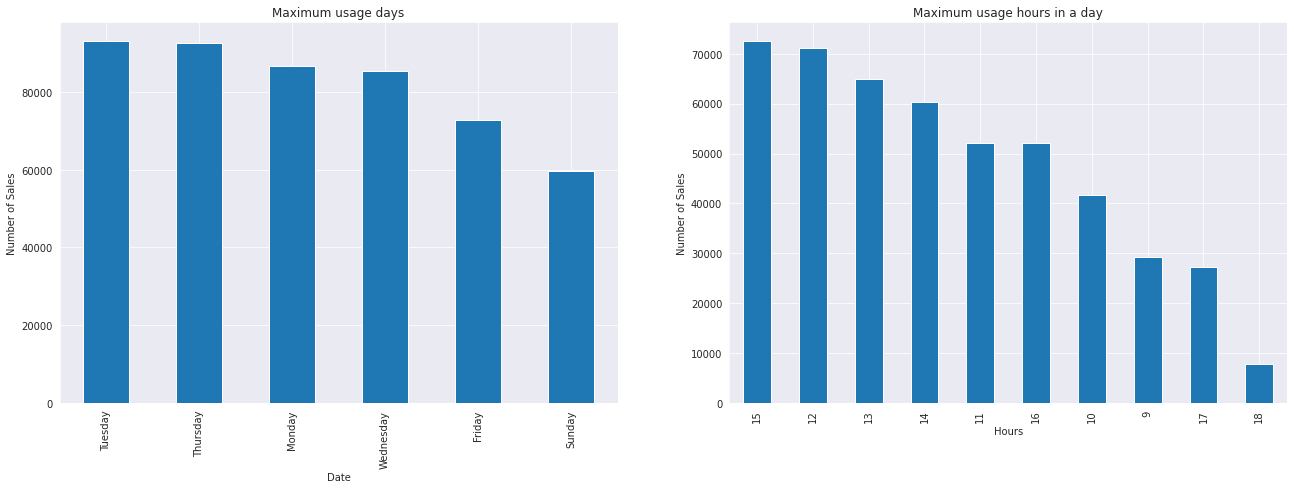

In [41]:
# Plot amount of sales on days of the week

import datetime as dt

fig,ax=plt.subplots(1,2)
df_uk.InvoiceDate.dt.day_name().value_counts().nlargest(10).plot(kind='bar', figsize=(20,7),ax=fig.axes[0])
ax[0].set_title("Maximum usage days")
ax[0].set_ylabel('Number of Sales')
ax[0].set_xlabel('Date')

df_uk.InvoiceDate.dt.hour.value_counts().nlargest(10).plot(kind='bar', figsize=(22,7),ax=fig.axes[1])
plt.title("Maximum usage hours in a day")
plt.ylabel('Number of Sales')
plt.xlabel('Hours')

**Maximum sales happen on Thursdays and Wednesdays around 11 AM to 4 PM and so we have to start triggering offers and special incentives on these days**

In [42]:
df_uk = df_uk[pd.notnull(df_uk['CustomerID'])]
df_uk.isnull().sum(axis=0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Total_Cost     0
dtype: int64

In [43]:
df_uk.shape

(356728, 8)

In [44]:
## Percentage Negative values in Quantity column 

len(df_uk[df_uk.Quantity<0])*100/len(df_uk)

2.1027225224821153

**There are around 2% of negative quantity values that are going to be removed.**

In [45]:
#Choose only rows of data wherein Quantity is positive

df_uk = df_uk[(df_uk['Quantity']>0)]
df_uk.Quantity.min()

1

In [46]:
df_uk.shape

(349227, 8)

In [47]:
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,20.34


### **Proportion of one time and repeat customers**

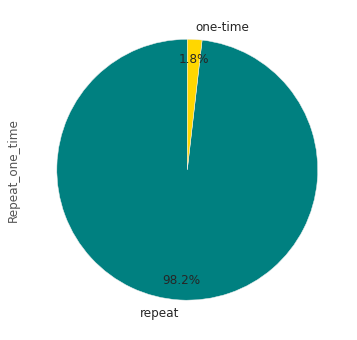

In [48]:
plt.figure(figsize=(12,6))

df_uk_custid=df_uk.CustomerID.value_counts().to_frame()
df_uk_custid['Repeat_one_time'] = np.where((df_uk_custid.CustomerID>1), 'repeat', 'one-time')

plt.style.use('ggplot')

media_df=df_uk_custid
media_per_user_group=media_df.groupby(['Repeat_one_time'])['Repeat_one_time'].count().nlargest(2)
media_per_user_group.plot(kind='pie', colors = ['teal','gold'], fontsize=12, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.show()

**The percentage of repeat customers are substantially more than the percentage of one-time customers. Mostly customers are happy with the retail store, We have to convert the one-time customers into repeat customers by offering them good incentives and proper service.**

**What are the most popular products that are bought in the UK?**

In [49]:
uk_product = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)[:10]
uk_product

,StockCode,Description,Quantity
2587,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2089,23166,MEDIUM CERAMIC TOP STORAGE JAR,76919
3005,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49086
3427,85099B,JUMBO BAG RED RETROSPOT,41878
3442,85123A,WHITE HANGING HEART T-LIGHT HOLDER,34630
3262,84879,ASSORTED COLOUR BIRD ORNAMENT,32628
1104,22197,POPCORN HOLDER,28923
1499,22616,PACK OF 12 LONDON TISSUES,24321
77,17003,BROCADE RING PURSE,22675
429,21212,PACK OF 72 RETROSPOT CAKE CASES,22442


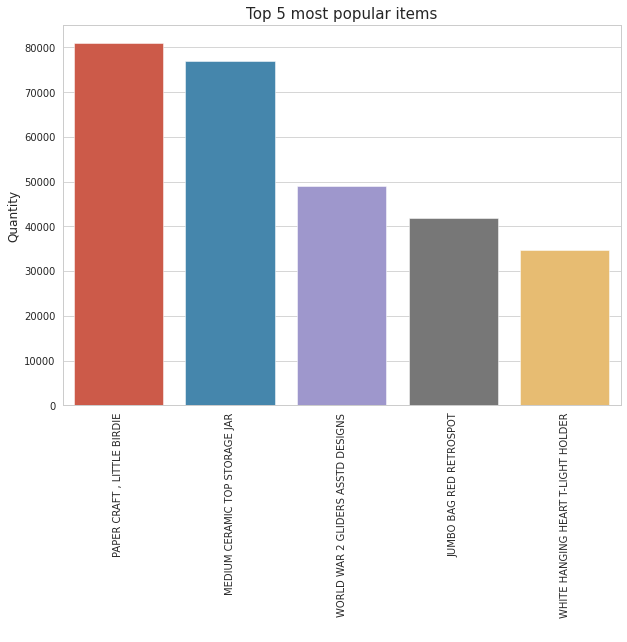

In [50]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,7))
sns.barplot(x= uk_product.Description[:5],y=uk_product.Quantity[:5], data=uk_product)
plt.title("Top 5 most popular items", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

**Which are the least popular products in UK?**

In [51]:
uk_product = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=True)[:10]
uk_product

,StockCode,Description,Quantity
490,21310,CAPIZ CHANDELIER,1
3573,90014C,SILVER AND BLACK ORBIT NECKLACE,1
3674,90100,NECKLACE+BRACELET SET PINK DAISY,1
2603,35597A,DUSTY PINK CHRISTMAS TREE 30CM,1
2604,35597B,BLACKCHRISTMAS TREE 30CM,1
3678,90104,PURPLE FRANGIPANI HAIRCLIP,1
3815,90202B,WHITE ENAMEL FLOWER HAIR TIE,1
3104,84569C,PACK 4 FLOWER/BUTTERFLY PATCHES,1
3632,90055,CRACKED GLAZE EARRINGS BROWN,1
3648,90065B,BLACK VINT ART DEC CRYSTAL BRACELET,1


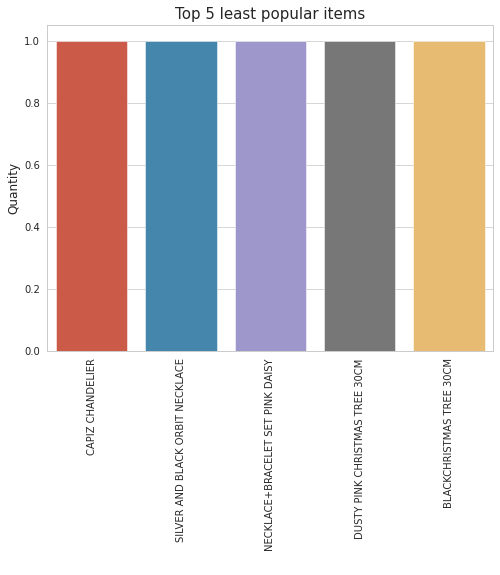

In [52]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x= uk_product.Description[:5],y=uk_product.Quantity[:5], data=uk_product)
plt.title("Top 5 least popular items", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

In [53]:
NOW = df_retail_uk['InvoiceDate'].max() + dt.timedelta(1)
NOW

Timestamp('2011-12-10 12:49:00')

### **RFM Analysis**

**RFM (Recency, Frequency, Monetary)** analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. 
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

- RECENCY (R): Days since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total money this customer spent.
We will create those 3 customer attributes for each customer.

#### **Calculating recency, frequency and monetary value using past user behaviour**

In [54]:
rfmTable = df_uk.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max() ).days, # Recency
                                        'InvoiceNo': lambda x: len(x),      # Frequency
                                        'Total_Cost': lambda x: x.sum()}) # Monetary Value

rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Total_Cost': 'monetary_value'}, inplace=True)

In [55]:
#Display RFM table
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,326,1,77183.60
12747.0,2,103,4196.01
12748.0,1,4413,33053.19
12749.0,4,199,4090.88
12820.0,3,59,942.34


*   CustomerID 12346 has frequency: 1, monetary value: $77183.60 and recency: 326 days.

*   CustomerID 12747 has frequency: 103, monetary value: $4196.01 and recency: 2 days.



**Let's check the details of the first customer.**

In [56]:
first_customer = df_uk[df_uk['CustomerID']== 12346.0]
first_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Cost
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,77183.6


**The first customer has shopped only once, bought one item at a huge quantity(74215). The unit price is very low, seems a clearance sale.**

In [57]:
segmented_rfm = rfmTable

####**Segmented RFM table using quartiles**

**The easiest way to split metrics into segments is by using quartile.**


*   This gives us a starting point for detailed analysis.
*   4 segments are easy to understand and explain.

In [58]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary_value
0.25,18.0,17.0,298.11
0.50,51.0,40.0,644.30
0.75,143.0,98.0,1570.81


In [59]:
#Convert quantiles to dictionary
quantiles = quantiles.to_dict()
quantiles

{'frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'monetary_value': {0.25: 298.11, 0.5: 644.3, 0.75: 1570.81},
 'recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0}}

### **Lowest recency, highest frequency and monetary are our best customers**

*   For recency a good customer would be a part of the lowest quartile designated as '1'.
*   For frequency and monetary a good customer would be a part of the highest quartile here designated as '1'.



In [60]:
# Create functions to separate customers into segments such as 1,2,3,4 based on quantile allocation.

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [61]:
# Create functions to separate customers into segments such as 1,2,3,4 based on quantile allocation.

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [62]:
# Assign segments to customers

segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))

In [63]:
#Explore the resultant segmented RFM table

segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,326,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,1,4413,33053.19,1,1,1
12749.0,4,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [64]:
#Create a new column with combined RFM Score

segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) \
                            + segmented_rfm.f_quartile.map(str) \
                            + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,326,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,1,4413,33053.19,1,1,1,111
12749.0,4,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


### **Data visualization**

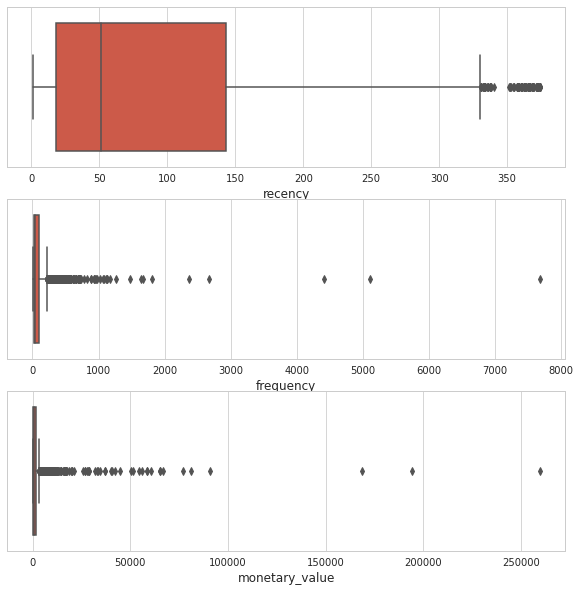

In [65]:
# Plot recency, freqiency and moneatry distribution
fig,ax=plt.subplots(3,1)
fig.set_size_inches(w=10,h=10)
sns.boxplot(x='recency',data=rfmTable,ax=fig.axes[0])
sns.boxplot(x='frequency',data=rfmTable,ax=fig.axes[1])
sns.boxplot(x='monetary_value',data=rfmTable,ax=fig.axes[2])

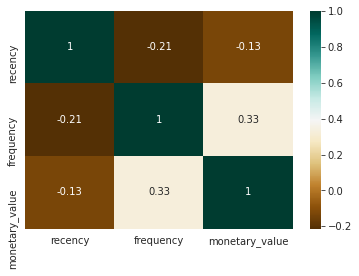

In [66]:
c= rfmTable[['recency','frequency','monetary_value']].corr()
sns.heatmap(data=c,cmap="BrBG",annot=True)
plt.show()

### **Observation**

*   Frequency and monetary value are positively correlated with each other implying an increase in frequency implies increase in monetary value.

*   Frequency and Recency are negatively correlated with each other implying an increase in frequency implies decrease in monetary value




### **Target different customer segments**

##**1. Best customers**

*   These are the customers that bought recently, buy often and spend a lot. It’s likely that they will continue to do so.

*   Since they already like you so much, consider marketing to them without price incentives to preserve your profit margin.

*   Be sure to tell these customers about new products you carry, how to connect on social networks, and any loyalty programs or social media incentives you run.






In [67]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
18102.0,1,431,259657.30,1,1,1,111
17450.0,8,336,194390.79,1,1,1,111
17511.0,3,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111


In [68]:
segmented_rfm['Segment_Type'] = np.where(segmented_rfm['RFMScore']=='111','Best customers','NA')

###**2. Big Spenders**


*   Big spenders have spent a lot of money over their lifetime as your customer.

*   They trust you enough to invest a lot in your products.

*   Considering marketing your most expensive products and top of the line models to this group.



In [69]:
# Another way to extract: segmented_rfm[segmented_rfm['RFMScore'].apply(lambda x: str(x)[-1])=='1'].sort_values('monetary_value', ascending=False)
segmented_rfm[segmented_rfm['m_quartile']==1].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Segment_Type
CustomerID,,,,,,,,
18102.0,1,431,259657.30,1,1,1,111,Best customers
17450.0,8,336,194390.79,1,1,1,111,Best customers
16446.0,1,3,168472.50,1,4,1,141,NA
17511.0,3,963,91062.38,1,1,1,111,Best customers
16029.0,39,241,80850.84,2,1,1,211,NA


In [70]:
a=segmented_rfm[(segmented_rfm['Segment_Type']=='NA') & (segmented_rfm['RFMScore'].apply(lambda x: str(x)[-1])=='1')]['Segment_Type'].replace('NA','Big Spenders')
ind=a.index
segmented_rfm['Segment_Type'][ind]='Big Spenders'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### **3. Loyal customers**

*   Anyone with a high frequency should be considered loyal. This doesn’t mean they have necessarily bought recently, or that they spent a lot, though you could define that with your R and M factors.





In [71]:
#segmented_rfm[segmented_rfm['RFMScore'].apply(lambda x: str(x)[-2])=='1'].sort_values('frequency', ascending=False)
segmented_rfm[segmented_rfm['r_quartile']==1].sort_values('frequency', ascending=False).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Segment_Type
CustomerID,,,,,,,,
17841.0,2,7676,40519.84,1,1,1,111,Best customers
14096.0,4,5111,65164.79,1,1,1,111,Best customers
12748.0,1,4413,33053.19,1,1,1,111,Best customers
14606.0,1,2677,12076.15,1,1,1,111,Best customers
15311.0,1,2366,60632.75,1,1,1,111,Best customers


In [72]:
a=segmented_rfm[(segmented_rfm['Segment_Type']=='NA') & (segmented_rfm['RFMScore'].apply(lambda x: str(x)[-2])=='1')]['Segment_Type'].replace('NA','Loyal Customers')
ind=a.index
segmented_rfm['Segment_Type'][ind]='Loyal Customers'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### **4. Loyal Joes**

*   Loyal Joes buy often, but don’t spend very much.

*   Goal should be to increase the share of wallet you have from this customer.

*   Send offers that require them to “Spend 100 rupees to save 20 rupees” and “Buy 4, Get 1 Free.” These offers create high hurdles that must be cleared to gain the reward, and will increase the amount these loyal customers spend with you.



In [73]:
segmented_rfm[segmented_rfm['RFMScore'].apply(lambda x: str(x)[-2:])=='14']

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Segment_Type
CustomerID,,,,,,,,
15060.0,8,115,294.25,1,1,4,114,Loyal Customers
17254.0,5,111,271.19,1,1,4,114,Loyal Customers


In [74]:
a=segmented_rfm[(segmented_rfm['Segment_Type']=='Loyal Customers') & (segmented_rfm['RFMScore'].apply(lambda x: str(x)[-2:])=='14')]['Segment_Type'].replace('Loyal Customers','Loyal Joes')
ind=a.index
segmented_rfm['Segment_Type'][ind]='Loyal Joes'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### **5. New spenders**







*   New Spenders are new customers that spent a lot of money on their first order(s). This is the kind of customer you want to convert into a loyal, regular customer that loves your products and brand. Be sure to welcome them and thank them for making a first purchase, and follow it up with unique incentives to come back again.

*   Consider branding the email with a special note from the CEO, and include a survey to ask about their experience.






In [75]:
segmented_rfm[segmented_rfm['RFMScore']=='141'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Segment_Type
CustomerID,,,,,,,,
16446.0,1,3,168472.5,1,4,1,141,Big Spenders
16000.0,3,9,12393.7,1,4,1,141,Big Spenders
16532.0,18,4,6748.8,1,4,1,141,Big Spenders
15195.0,3,1,3861.0,1,4,1,141,Big Spenders
15473.0,14,11,1771.2,1,4,1,141,Big Spenders


In [76]:
a=segmented_rfm[(segmented_rfm['Segment_Type']=='Big Spenders') & (segmented_rfm['RFMScore']=='141')]['Segment_Type'].replace('Big Spenders','New Spenders')
ind=a.index
segmented_rfm['Segment_Type'][ind]='New Spenders'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### **6. Lost Customers**

* Lost Customers used to buy frequently from you, and at one point they spent a lot with you, but they’ve stopped. Now it’s time to win them back. 
* They might be lost to a competitor; they might not have need of your products anymore, or they might have had a bad customer service experience with you.

In [77]:
segmented_rfm[segmented_rfm['RFMScore']=='411'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Segment_Type
CustomerID,,,,,,,,
13093.0,276,159,7832.470,4,1,1,411,Big Spenders
17850.0,372,297,5391.210,4,1,1,411,Big Spenders
15379.0,169,194,3703.290,4,1,1,411,Big Spenders
15808.0,306,195,3651.270,4,1,1,411,Big Spenders
13952.0,218,137,3251.071,4,1,1,411,Big Spenders


In [78]:
a=segmented_rfm[(segmented_rfm['Segment_Type']=='Big Spenders') & (segmented_rfm['RFMScore']=='411')]['Segment_Type'].replace('Big Spenders','Lost Customers')
ind=a.index
segmented_rfm['Segment_Type'][ind]='Lost Customers'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### **7. Almost Lost customers**

* It has just been less time since they purchased. These customers might warrant more aggressive discounts so that you can win them back before it’s too late.
* It is much less expensive it is to keep customers compared to winning new ones

In [79]:
segmented_rfm[segmented_rfm['RFMScore']=='311'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Segment_Type
CustomerID,,,,,,,,
16180.0,100,162,10254.18,3,1,1,311,Big Spenders
14952.0,60,138,8099.49,3,1,1,311,Big Spenders
16745.0,87,355,7180.70,3,1,1,311,Big Spenders
16652.0,59,118,6773.97,3,1,1,311,Big Spenders
17509.0,58,364,6083.64,3,1,1,311,Big Spenders


In [80]:
a=segmented_rfm[(segmented_rfm['Segment_Type']=='Big Spenders') & (segmented_rfm['RFMScore']=='311')]['Segment_Type'].replace('Big Spenders','Almost Lost Customers')
ind=a.index
segmented_rfm['Segment_Type'][ind]='Almost Lost Customers'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### **8. Splurgers**
* Splurgers combine a high Monetary Value with a low Frequency, which means they’ve spent a lot of money in just a few orders. Because they have the wealth and willingness to spend a lot with you, target high priced products with good margins at this group. 

* This group might also correspond with seasonal events or even just the typical buying cycle of your product’s wear.

In [81]:
segmented_rfm[segmented_rfm['RFMScore'].apply(lambda x: str(x)[-2:])=='41'].head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Segment_Type
CustomerID,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,Big Spenders
12823.0,75,5,1759.50,3,4,1,341,Big Spenders
13135.0,197,1,3096.00,4,4,1,441,Big Spenders
13631.0,100,11,3070.42,3,4,1,341,Big Spenders
13763.0,63,15,1714.96,3,4,1,341,Big Spenders


In [82]:
a=segmented_rfm[(segmented_rfm['Segment_Type']=='Big Spenders') & (segmented_rfm['RFMScore'].apply(lambda x: str(x)[-2:])=='41')]['Segment_Type'].replace('Big Spenders','Splurgers')
ind=a.index
segmented_rfm['Segment_Type'][ind]='Splurgers'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### **9. Deadbeats**

*   These customers spent very little, bought very few times, and
last ordered quite a while ago. They are unlikely to be worth
much time, so put them in your general house list and
consider a re-opt-in campaign.



In [83]:
segmented_rfm[segmented_rfm['RFMScore']=='444'].sort_values('monetary_value', ascending=False).head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Segment_Type
CustomerID,,,,,,,,
17678.0,264,16,298.11,4,4,4,444,NA
12881.0,276,7,298.00,4,4,4,444,NA
17531.0,190,14,296.70,4,4,4,444,NA
13751.0,288,9,296.25,4,4,4,444,NA
16998.0,150,4,295.00,4,4,4,444,NA


In [84]:
a=segmented_rfm[(segmented_rfm['Segment_Type']=='NA') & (segmented_rfm['RFMScore']=='444')]['Segment_Type'].replace('NA','Deadbeats')
ind=a.index
segmented_rfm['Segment_Type'][ind]='Deadbeats'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### **Treemap for different RFM segments**

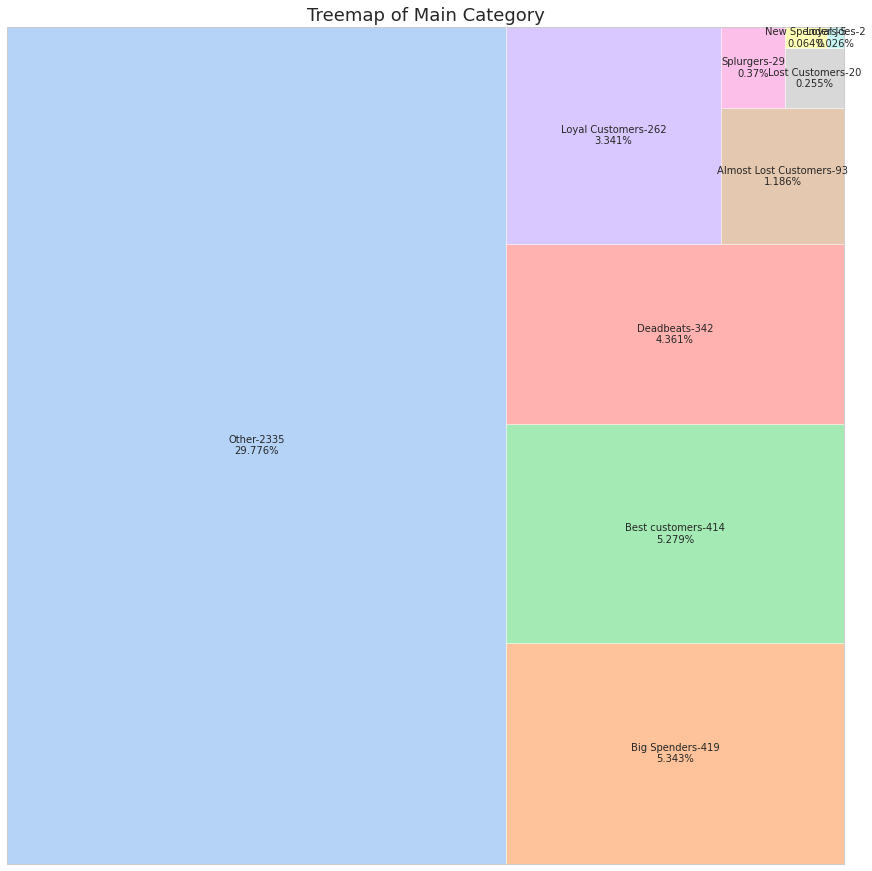

In [85]:
segmented_rfm['Segment_Type']=segmented_rfm['Segment_Type'].str.replace('NA','Other')

fig = plt.figure(figsize = (10,30))
regions = segmented_rfm.Segment_Type.value_counts().to_frame()
regions['count_val']=regions.values
regions['percent']=regions['count_val']/(regions.values.sum())*100
ax = fig.add_subplot(111, aspect = "equal")
ax = squarify.plot(sizes = regions["Segment_Type"].values, label = (regions.index+'-'+regions.count_val.astype(str)+'\n'+regions.percent.round(3).astype(str))+'%',
              color = sns.color_palette("pastel", 20), alpha = 0.8)
ax.set_xticks([])
ax.set_yticks([])
fig = plt.gcf()
fig.set_size_inches(15, 30)
plt.title("Treemap of Main Category", fontsize = 18)
plt.show()

## **Building Prediction models for customer segmentation using Kmeans Clustering**

### **Data preparation**

In [86]:
# Let's remove customer with zero monetary value
rfmTable[rfmTable.monetary_value == 0]

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Segment_Type
CustomerID,,,,,,,,
13256.0,14,1,0.0,1,4,4,144,Other


In [87]:
rfmTable = rfmTable.drop(rfmTable.index[314])

### **Let's explore the distribution of recency, frequency and monetary value**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


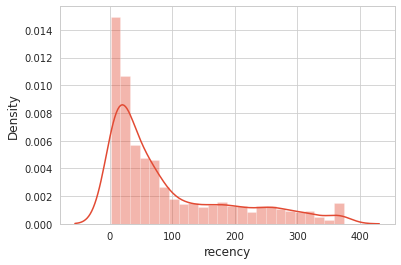

In [88]:
sns.distplot(rfmTable['recency'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


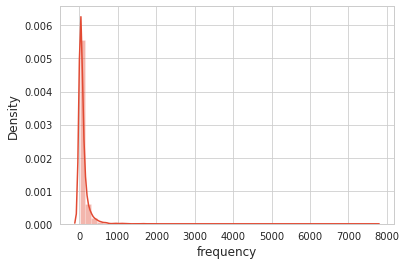

In [89]:
sns.distplot(rfmTable['frequency'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


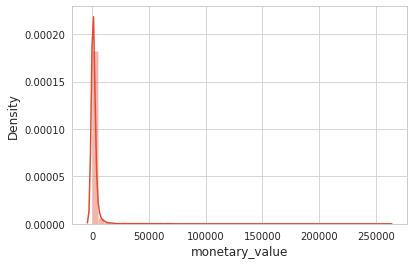

In [90]:
sns.distplot(rfmTable['monetary_value'])
plt.show()

**All distributions are highly right skewed. We have make these distriabutions normal in order to create meaningful clusters**

In [91]:
#Perform log transformation

rfmTable_log = np.log(rfmTable[['recency','frequency','monetary_value']]+1)

In [92]:
rfmTable_log.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,5.789960,0.693147,11.253955
12747.0,1.098612,4.644391,8.342128
12748.0,0.693147,8.392537,10.405904
12749.0,1.609438,5.298317,8.316760
12820.0,1.386294,4.094345,6.849427


In [93]:
# Standardize the recency, frequency, monetary values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfmTable_log)

# Scale and center the data
rfmTable_log_normalized = scaler.transform(rfmTable_log)

# Create a pandas DataFrame
rfmTable_log_normalized = pd.DataFrame(data=rfmTable_log_normalized, index=rfmTable_log.index, columns=rfmTable_log.columns)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

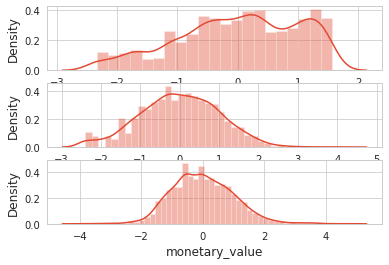

In [94]:
# Plot distributions after log normalization
plt.subplot(3,1,1)
sns.distplot(rfmTable_log_normalized['recency'])
plt.subplot(3,1,2)
sns.distplot(rfmTable_log_normalized['frequency'])
plt.subplot(3,1,3)
sns.distplot(rfmTable_log_normalized['monetary_value'])

**Once log transformation and standardization are performed all three distributions become symmetric.**

### **Model Building**

### **Step 1: Perform Elbow method to find optimum number of clusters**

In [95]:
sse={}
# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(rfmTable_log_normalized)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

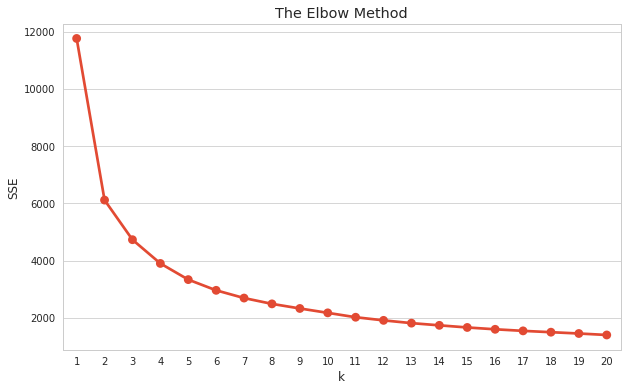

In [96]:
plt.figure(figsize=(10,6))

# Add the plot title "The Elbow Method"
plt.title('The Elbow Method')

# Add X-axis label "k"
plt.xlabel('k')

# Add Y-axis label "SSE"
plt.ylabel('SSE')

# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

**The optimium number of clusters seems to be 4.**

### **Step 2: Perform kmeans clustering**

In [97]:
# Initialize KMeans
kmeans = KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(rfmTable_log_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

### **Step 3: Let's explore cluster properties**

In [98]:
#Create a DataFrame by adding a new cluster label column
rfm_k4 = rfmTable.assign(Cluster=cluster_labels)

# Group the data by cluster
grouped = rfm_k4.groupby(['Cluster'])

# Calculate average RFM values and segment sizes per cluster value
grouped.agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': ['mean', 'count']
  }).round(1)

recency frequency monetary_value      
           mean      mean           mean count
Cluster                                       
0         186.1      15.0          290.7  1254
1          12.2     276.2         6300.8   767
2          20.7      36.6          564.8   788
3          92.2      80.8         1478.6  1111

### **Step 4: Which cluster do we have to focus on to improve revenue?**

In [99]:
# Melt the normalized dataset and reset the index
rfm_melt = pd.melt(rfm_k4.reset_index(), 
                        
# Assign CustomerID and Cluster as ID variables                  
                    id_vars=['CustomerID', 'Cluster'],

# Assign RFM values as value variables
                    value_vars=['recency', 'frequency', 'monetary_value'], 
                        
# Name the variable and value
                    var_name='Metric', value_name='Value')

In [100]:
rfm_melt.head()

,CustomerID,Cluster,Metric,Value
0,12346.0,3,recency,326.0
1,12747.0,1,recency,2.0
2,12748.0,1,recency,1.0
3,12749.0,1,recency,4.0
4,12820.0,2,recency,3.0


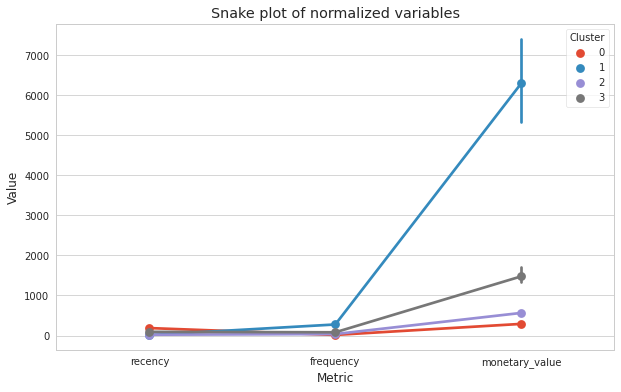

In [101]:
plt.figure(figsize=(10,6))

# Add the plot title
plt.title('Snake plot of normalized variables')

# Add the x axis label
plt.xlabel('Metric')

# Add the y axis label
plt.ylabel('Value')

# Plot a line for each value of the cluster variable
sns.pointplot(data=rfm_melt, x='Metric', y='Value', hue='Cluster')

**We have to focus on Cluster 3 to improve revenue**

In [102]:
rfm_k4[rfm_k4['Cluster']==3].head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore,Segment_Type,Cluster
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,4,4,1,441,Splurgers,3
12822.0,71,46,948.88,3,2,2,322,Other,3
12830.0,38,38,6814.64,2,3,1,231,Big Spenders,3
12836.0,59,174,2610.36,3,1,1,311,Almost Lost Customers,3
12838.0,34,120,671.95,2,1,2,212,Loyal Customers,3


#***Conclusion-***
1. **United Kingdom is the highest revenue generating country in the dataset. It has highest number of customers** 

2. **Month of November has highest sale. Similarly in weekdays Thursday have highest sale.**

3. ****Maximum sales happen on Thursdays and Wednesdays around 11 AM to 4 PM and so we have to start triggering offers and special incentives on these days****

4. **Most frequently used item is PAPER CRAFT,LITTLE BIRDIE	and least frequently used item is CAPIZ CHANDELIER.**

5. **The percentage of repeat customers are substantially more than the percentage of one-time customers. Mostly customers are happy with the retail store, We have to convert the one-time customers into repeat customers by offering them good incentives and proper service.**

6. **Performed k-means clustering and segmented dataset into different clusters like Best customers, Loyal Customers, Best spender customer, Lost customers etc.**